# 1.1. Теоретический материал – Линейные регрессионные модели

**Линейная регрессия**
Линейная регрессия (Linear regression) – модель зависимости переменной x от одной или нескольких других переменных (факторов, регрессоров, независимых переменных) с линейной функцией зависимости. Линейная регрессия относится к задаче определения «линии наилучшего соответствия» через набор точек данных и стала простым предшественником нелинейных методов, которые используют для обучения нейронных сетей.

Цель линейной регрессии — поиск линии, которая наилучшим образом соответствует этим точкам. Напомним, что общее уравнение для прямой есть 𝑓 (𝑥) = 𝑏 + 𝑚 ⋅ 𝑥 +, где 𝑚 – наклон линии, а 𝑏 – его сдвиг. 

**Функция потерь — метод наименьших квадратов**  
Функция потерь – это мера количества ошибок, которые наша линейная
регрессия делает на наборе данных. Хотя есть разные функции потерь, все они
вычисляют расстояние между предсказанным значением 𝑦(х) и его
фактическим значением.
Одна очень распространенная функция потерь называется средней
квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все
значения ошибок, считаем их квадраты длин и усредняем.

**Задача экраполяции**   
Допустим у нас есть много экспериментальных точек. Необходимо через них провести кривую, которая как можно ближе проходила к этим точкам. При этом необходимо минимизировать среднюю квадратичную ошибку (MSE). Для решения данной задачи в Python есть множество библиотек. Самыми распостраненными выступают:

**numpy - numpy.linalg.lstsq**  
**scipy - scipy.linalg** (содержит все функции из numpy.linalg плюс часть
новых функций, которых нет в numpy.linalg).

## 1.2.1 Пример
### Задача:
#### Проведем прямую 𝑦 = 𝑚𝑥 + 𝑏 через экспериментальные точки.
### Решение / Ответ:

In [1]:
import numpy as np
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

#Перепишем линейное уравнение y = mx + c как y = Ap, ult A = [[ x1 ]] и p = [[m], [c]]
#Построим А по Х
A = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [2]:
#Используем метод lstsq для решения его относительно р.
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

0.9999999999999997 -0.9499999999999992


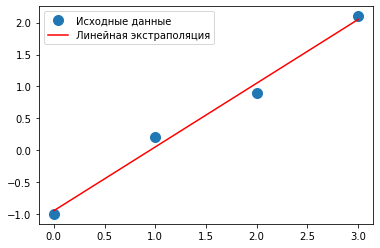

In [3]:
#Построим график полученой прямой и укажем на нем точки.
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

## 1.2.2 Пример
### Задача:
#### Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в построении эстраполяционного полинома второго порядка (параболы). Таким образом, необходимо найти такие коэффициенты полинома 𝑎, 𝑏, 𝑐 по методу наименьших квадратов. Данные мтогут быть получены в результате измерений. Покажем пример генерации данных случайным образом и загрузки их из файла.
### Решение / Ответ:

In [4]:
from numpy import *
from numpy.random import *
#генерируем случайные x и y
delta = 1.0
x = linspace(-5, 5, 11)
y = x**2+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)

#записываем данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

In [5]:
# читаем данные из файла
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

[-5.40748309 -4.32613263 -2.88726945 -1.52516613 -0.86358848 -0.146486
  0.75613256  1.67138682  3.00762026  3.79435421  4.76043064]
[25.19770725 15.81650276  9.16774698  3.91538183  0.96355438  0.21424777
  1.01953984  3.84932007  8.7240383  15.76719398 25.0883956 ]


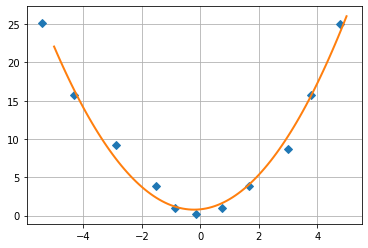

In [6]:
# Нахождение коэффициентов функции вида y=ax^2+bx+c методом наименьших квадратов
# задаем вектор m=[x**2, x, E]
m = vstack((x**2, x, ones(11))).T
# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [-5, 5]
x_prec = linspace(-5, 5, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида у=ах^2+bx+c, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0]*x_prec**2+s[1]*x_prec+s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола.png')

## 1.2.3 Пример
### Задача:
#### По данным предыдущего примера постройте эстраполяционного полинома третьего порядка
### Решение / Ответ:

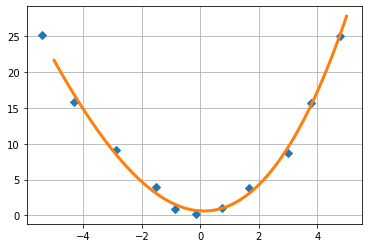

In [7]:
# Нахождение коэффициентов функции вида y=ax^3+bx^2+cx+d методом наименьших квадратов
# задаем вектор m=[x**3, x, E]
m = vstack((x**3, x**2, x, ones(11))).T
# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [-5, 5]
x_prec = linspace(-5, 5, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида y=ax^3+bx^2+cx+d,подставляя из решения коэффициенты s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0]*x_prec**3+s[1]*x_prec**2+s[2]*x_prec+s[3], '-', lw=3)
plt.grid()
plt.savefig('полином 3-й степени.png')

## 1.3.1. Задание
### Задача:
#### Представьте собственные данные и постройте эктраполяцию полиномами первой, второй и третьей степени.
### Решение / Ответ:

[-6  0 -9  8 -1  3  4] 
 [-7.73939364  6.12117067 -2.4594075  -4.53014676  0.21608409 -3.09134733
  0.62977331]
0.11509564228613561 -1.5340245037516027


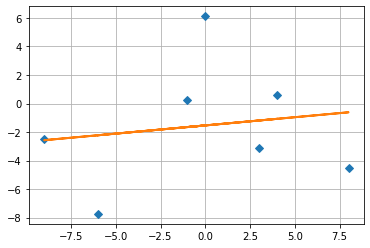

In [8]:
import numpy as np

x = np.array(np.random.randint(-10, 10, size=7), dtype=int)
y = np.array(np.random.uniform(-10, 10, size=7), dtype=float)

print(x, '\n', y)
    
A = np.vstack([x, np.ones(len(x))]).T

m, c = np.linalg.lstsq(A, y, rcond = None)[0]

print(m, c)

plt.plot(x, y, 'D', markersize=5)
plt.plot(x, m * x + c, '-', lw=2)
plt.grid()
plt.show()

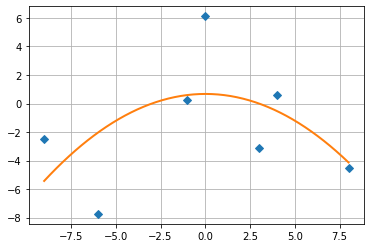

In [9]:
m = vstack((x**2, x, ones(len(x)))).T

s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(min(x), max(x))

plt.plot(x, y, 'D')
plt.plot(x_prec, s[0]*x_prec**2 + s[1]*x_prec + s[2], '-', lw=2)
plt.grid()
plt.show()

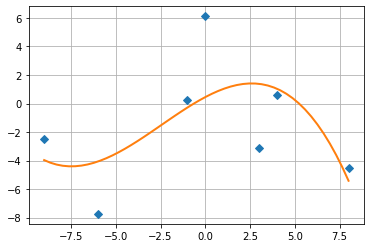

In [10]:
m = vstack((x**3, x**2, x, ones(len(x)))).T

s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(min(x), max(x))

plt.plot(x, y, 'D')
plt.plot(x_prec, s[0]*x_prec**3 + s[1]*x_prec**2 + s[2]*x_prec + s[3], '-', lw=2)
plt.grid()
plt.show()

## 1.2.4 Пример
### Задача:
#### Необходимо проверить гипотезу, что наши точечно заданная функция ложитсяна кривую вида 𝑓(𝑥, 𝑏) = $𝑏_{0}$ + $𝑏_{1}$𝑒𝑥𝑝(−𝑏$2𝑥^{2}$)
### Решение / Ответ:

In [11]:
import numpy as np
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0+b1*np.exp(-b2*x**2)
# зададим массив точек хi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек уi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y+0.05*np.random.randn(len(xdata))
print(xdata)
print(ydata)

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[0.95300851 0.97905406 1.07103315 0.9738014  1.01086391 0.92019338
 0.84367219 0.87697853 0.70248392 0.84602031 0.62934594 0.59452401
 0.57632132 0.57347299 0.54755437 0.54986621 0.44847198 0.37492668
 0.37880111 0.41563577 0.32043892 0.26206197 0.40783903 0.24315626
 0.28951267 0.32184437 0.2443525  0.28105996 0.32680061 0.28212799
 0.21088936 0.30760006 0.22638029 0.25807713 0.18672771 0.13251308
 0.18742957 0.22298523 0.23901828 0.15

In [12]:
import scipy as sp
#Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata
from scipy.optimize import curve_fit
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt

array([0.24825579, 0.76154402, 0.50375294])

In [13]:
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

0.0002569098558134676
0.13432508582568523


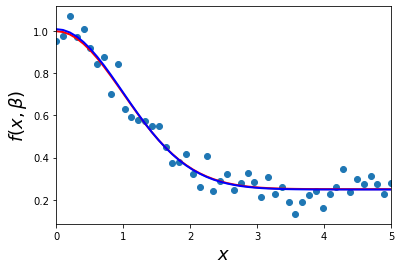

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

## 1.2.5 Пример
### Задача:
#### Необходимо проверить гипотезу, что наши точечно заданная функция ложится на кривые вида:  
1) $𝑓(𝑥, 𝑏) = 𝑏_{0} + 𝑏_{1}𝑥$  
2) $𝑓(𝑥, 𝑏) = 𝑏_{0} + 𝑏_{1}𝑥 + 𝑏_{2}𝑥^{2}$  
3) $𝑓(𝑥, 𝑏) = 𝑏_{0} + 𝑏_{1}𝑙𝑛(𝑥)$  
4) $𝑓(𝑥, 𝑏) = 𝑏_{0} 𝑥^{𝑏_{1}}$  
### Решение / Ответ:

In [15]:
#решение
#1
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75) 
def f(x, b0, b1): 
    return b0 + b1 * x
# зададим массив точек хі
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек уi (без шума)
y = f(xdata, *beta) 
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata) 
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.24008639 0.75564232]
0.00013780653733779278
0.12117470938911426


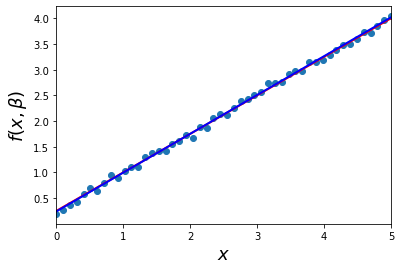

In [16]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata) 
ax.plot(xdata, y, 'r', lw=2) 
ax.plot(xdata, f(xdata, *beta_opt), "b", lw=2) 
ax.set_xlim(0, 5) 
ax.set_xlabel(r"$x$", fontsize=18) 
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()

In [17]:
#решение
#2
#Добабим шума в данные, сделамные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5) 
beta = (0.25, 0.75, 0.5) 
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x
# зададим массив точек xі 
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения тачек уi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt) 
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим кбадратичное отклонение
residuals = ydata - f(xdata, *beta_opt) 
fres = sum(residuals**2)
print(fres)

[0.2283109  0.75723559 0.49946598]
9.374264699230818e-05
0.07817155004842595


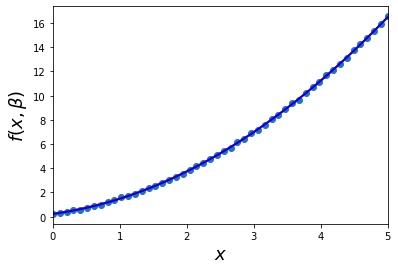

In [18]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata) 
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), "b", lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

In [19]:
#решение #3
#Добабим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2) 
beta = (1, 2)
def f(x, b0, b1): 
    return b0 + b1 * np.log(x)
# зададим массив точек хі 
xdata = np.linspace(1, 5, 50) 
# создаем теоретически правильные значения точек уi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные 
ydata = y + 0.05 *np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata) 
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение 
residuals = ydata - f(xdata,*beta_opt) 
fres = sum(residuals**2)
print(fres)

[0.98568312 2.01559809]
3.798521781523491e-05
0.08783858816074143


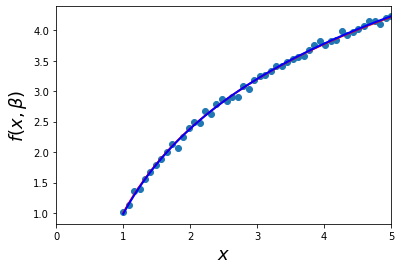

In [20]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), "b", lw=2) 
ax. set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt. show()

In [21]:
#решение 
#4
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2) 
beta = (1, 2) 
def f(x, b0, b1):
    return b0* x** b1 
# зададим массив тачек xі
xdata = np.linspace(1, 5, 50)
# создаем теоретически правильные значения точек уi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные 
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение 
residuals = ydata - f(xdata, *beta_opt) 
fres = sum(residuals**2) 
print(fres)

[0.99475967 2.00356368]
4.5317349315721554e-06
0.10985262277345963


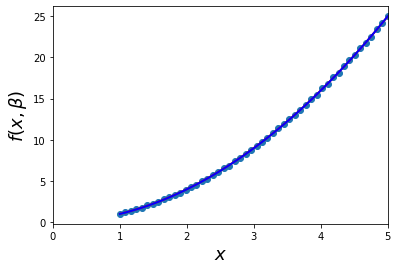

In [22]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2) 
ax.plot(xdata, f(xdata, *beta_opt), "b", lw=2) 
ax.set_xlim(0, 5) 
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()

## 1.3.2. Задание
### Задача:
#### Подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте динамику изменения данных.
### Решение / Ответ:

In [23]:
def curve_1():
    #решение
    #1
    #Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами 
    beta = (np.random.uniform(0.25, 0.5), np.random.uniform(0.75, 1)) 
    def f(x, b0, b1): 
        return b0 + b1 * x
    # зададим массив точек хі
    xdata = np.linspace(0, 5, 50)
    # создаем теоретически правильные значения точек уi (без шума)
    y = f(xdata, *beta) 
    # зашумляем эти данные
    ydata = y + 0.05 * np.random.randn(len(xdata))
    beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata) 
    print(beta_opt)
    #Вычислим линейное отклонение
    lin_dev = sum(beta_cov[0])
    print(lin_dev)

    #Вычислим квадратичное отклонение
    residuals = ydata - f(xdata, *beta_opt)
    fres = sum(residuals**2)
    print(fres)
    
    fig, ax = plt.subplots()
    ax.scatter(xdata, ydata)
    ax.plot(xdata, y, 'r', lw=2) 
    ax.plot(xdata, f(xdata, *beta_opt), "b", lw=2) 
    ax.set_xlim(0, 5) 
    ax.set_xlabel(r"$x$", fontsize=18)
    ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
    plt.show()
    
def curve_2():
    #решение
    #2
    #Добабим шума в данные, сделамные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5) 
    beta = (np.random.uniform(0.25, 0.49), np.random.uniform(0.75, 1), np.random.uniform(0.5, 0.74)) 
    def f(x, b0, b1, b2):
        return b0 + b1 * x + b2 * x * x
    # зададим массив точек xі 
    xdata = np.linspace(0, 5, 50)
    # создаем теоретически правильные значения тачек уi (без шума)
    y = f(xdata, *beta)
    # зашумляем эти данные
    ydata = y + 0.05 * np.random.randn(len(xdata))
    beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
    print(beta_opt) 
    #Вычислим линейное отклонение
    lin_dev = sum(beta_cov[0])
    print(lin_dev)

    #Вычислим кбадратичное отклонение
    residuals = ydata - f(xdata, *beta_opt) 
    fres = sum(residuals**2)
    print(fres)
    
    fig, ax = plt.subplots()
    ax.scatter(xdata, ydata)
    ax.plot(xdata, y, 'r', lw=2) 
    ax.plot(xdata, f(xdata, *beta_opt), "b", lw=2) 
    ax.set_xlim(0, 5) 
    ax.set_xlabel(r"$x$", fontsize=18)
    ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
    plt.show()
    
def curve_3():
    #решение #3
    #Добабим шума в данные, сделанные по функции f(x,b) 
    beta = (np.random.randint(1, 2), np.random.randint(2, 3))
    def f(x, b0, b1): 
        return b0 + b1 * np.log(x)
    # зададим массив точек хі 
    xdata = np.linspace(1, 5, 50) 
    # создаем теоретически правильные значения точек уi (без шума)
    y = f(xdata, *beta)
    # зашумляем эти данные 
    ydata = y + 0.05 *np.random.randn(len(xdata))
    beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata) 
    print(beta_opt)
    #Вычислим линейное отклонение
    lin_dev = sum(beta_cov[0])
    print(lin_dev)

    #Вычислим квадратичное отклонение 
    residuals = ydata - f(xdata,*beta_opt) 
    fres = sum(residuals**2)
    print(fres)
    
    fig, ax = plt.subplots()
    ax.scatter(xdata, ydata)
    ax.plot(xdata, y, 'r', lw=2) 
    ax.plot(xdata, f(xdata, *beta_opt), "b", lw=2) 
    ax.set_xlim(0, 5) 
    ax.set_xlabel(r"$x$", fontsize=18)
    ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
    plt.show()

def curve_4():
    #решение 
    #4
    #Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2) 
    beta = (np.random.randint(1, 2), np.random.randint(2, 3))
    def f(x, b0, b1):
        return b0 * x ** b1 
    # зададим массив тачек xі
    xdata = np.linspace(1, 5, 50)
    # создаем теоретически правильные значения точек уi (без шума)
    y = f(xdata, *beta)
    # зашумляем эти данные 
    ydata = y + 0.05 * np.random.randn(len(xdata))
    beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
    print(beta_opt)
    #Вычислим линейное отклонение
    lin_dev = sum(beta_cov[0])
    print(lin_dev)

    #Вычислим квадратичное отклонение 
    residuals = ydata - f(xdata, *beta_opt) 
    fres = sum(residuals**2) 
    print(fres)
    
    fig, ax = plt.subplots()
    ax.scatter(xdata, ydata)
    ax.plot(xdata, y, 'r', lw=2) 
    ax.plot(xdata, f(xdata, *beta_opt), "b", lw=2) 
    ax.set_xlim(0, 5) 
    ax.set_xlabel(r"$x$", fontsize=18)
    ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
    plt.show()

[0.48806416 0.78402833]
0.00010546474626713968
0.09273624148377049


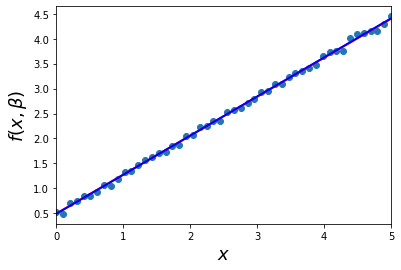

In [24]:
curve_1()

[0.43568456 0.76083367 0.65487538]
0.00011858535043378672
0.0988877684159833


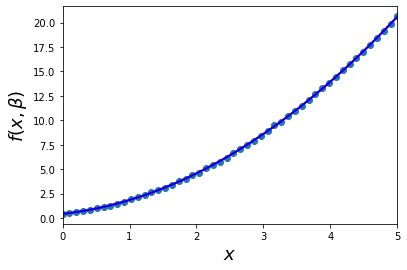

In [25]:
curve_2()

[1.00923357 1.99330931]
5.028913278625331e-05
0.11629066852150617


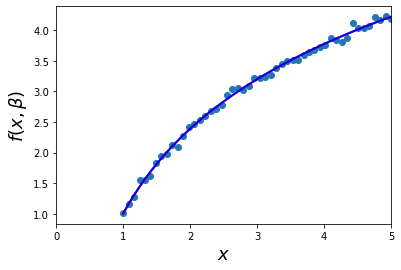

In [26]:
curve_3()

[1.00044362 1.99932398]
7.01861885153861e-06
0.1666122270934892


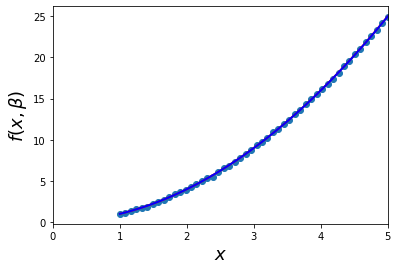

In [27]:
curve_4()

---

# 2.1. Теоретический материал – Задачи регрессии

**Линейная регрессия** - это широко используемый метод статистического анализа, который использует регрессионный анализ в математической статистике для определения количественной взаимосвязи между двумя или более переменными. Если регрессионный анализ включает две или более независимых переменных, а связь между зависимой и независимой

В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного
обучения можно использовать для реализации функций регрессии. Мы начнем
с простой линейной регрессии с участием двух переменных, а затем перейдем к
линейной регрессии с участием нескольких переменных.

## 2.2.1 Пример
### Задача:
#### Построим простую линейную регрессию в Python с использованием библиотеки scikit-learn
### Решение / Ответ:

In [28]:
#Импортируем необходимые библиотеки
#используем pandas и питpу для обработки данных,
#matplotlib для визуализации и sklearn для обучения наборов данных и импорта моделей.
import pandas as pd 
import numpy as np
import matplotlib. pyplot as plt
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#создадим набор данных для описания взаимосвязи между временем обучения студентов и успеваемостью 
my_dict = {"Учебное время" : [0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50],
           "Оценка": [10,22,13,43,20,22,33,50,62,48,55,75,62,73,81,76,64,82,90,93]}
dataset = pd.DataFrame(my_dict) 
dataset.head()

,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [29]:
# Исследуем набор данных
print(dataset.shape)
dataset.describe()

(20, 2)


,Учебное время,Оценка
count,20.000000,20.000000
mean,2.787500,53.700000
std,1.507165,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.625000,58.500000
75%,4.062500,75.250000
max,5.500000,93.000000


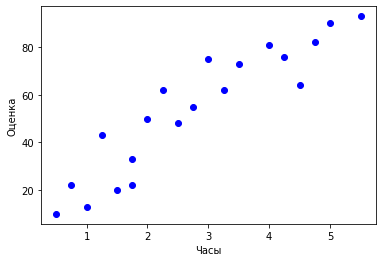

In [30]:
# Нарисуем точечную диаграмму
plt.scatter(dataset['Учебное время'], dataset['Оценка'], color = 'b', label = "данные экзамена") 
plt.xlabel("Часы") 
plt.ylabel("Оценка") 
plt.show()

После того как мы получили представление о данных, разделим информацию на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки – это зависимые переменные, значения которых должны быть предсказаны. В нашем наборе всего два столбца и необходимо предсказать оценку в зависимости от количества часов. Чтобы извлечь атрибуты и метки, выполните следующий скрипт:

In [31]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X)
print(y)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]


In [32]:
# Теперь, когда у нас есть атрибуты и метки, необходимо разделить их на а обучающий и тестовый наборы. 
# Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набор тестов 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [33]:
# далее можно обучить алгоритм линейной регрессии 
# необходимо импортировать класс LinearRegression, создать его экземпляр и вызвать метод fit() 
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression()

In [34]:
#приведем получившиеся коэффициенты для линии регрессии 
print(regressor.intercept_)
print(regressor.coef_)

5.475400029908791
[17.02706744]


Получившийся результат можно интерпретировать следующим образом: с каждым затраченным часом на обучение результат экзамена повышается приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы будем использовать наши тестовые данные и посмотрим, насколько точно наш алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на тестовых данных необходимо выполнить следующий код:

In [35]:
y_pred = regressor.predict(X_test) 
# сравним фактические значения с прогнозируемыми 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,90,90.610737
1,22,18.245701
2,93,99.124271
3,62,43.786302


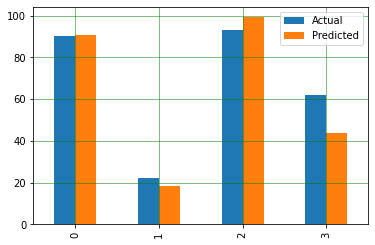

In [36]:
# визуализируем результат сравнения в виде гистограммы
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green') 
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black') 
plt.show()

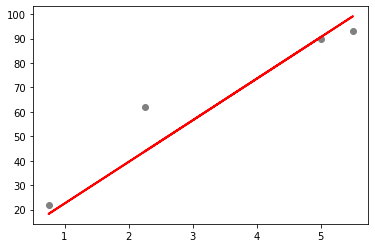

In [37]:
#построим линию регрессии с тестовыми данными 
plt.scatter(X_test, y_test, color='gray') 
plt.plot(X_test, y_pred, color='red', linewidth=2) 
plt.show()

## 2.3.1. Задание
### Задача:
#### Постройте модель линейной регрессии для произвольных данных из двух столбцов. Для примера можно взять точечную зависимость заработной платы от опыта работы: (https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv). Найдите коэффициенты линии регрессии. Постройте прогноз.
### Решение / Ответ:

In [38]:
url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
df = pd.read_csv(url)

X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression() 
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

26780.09915062818
[9312.57512673]


In [39]:
y_pred = regressor.predict(X_test) 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


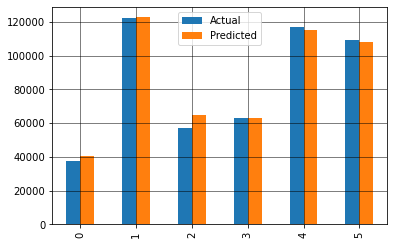

In [40]:
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black') 
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black') 
plt.show()

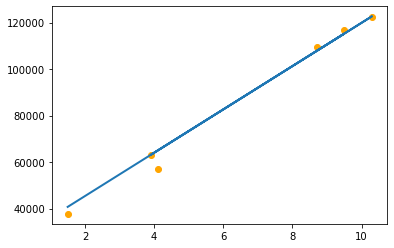

In [41]:
plt.scatter(X_test, y_test, color='orange') 
plt.plot(X_test, y_pred, linewidth=2) 
plt.show()

---

# 3.1. Теоретический материал – Задачи регрессии

В предыдущем примере мы проиллюстрировали линейную регрессию с двумя переменными. Однако, почти все реальные задачи имеют больше параметров. Линейная регрессия с участием нескольких переменных называется «множественной линейной регрессией» или многомерной линейной регрессией. Шаги для выполнения множественной линейной регрессии аналогичны шагам для простой . Разница заключается в оценке. Вы можете использовать множественную регрессию, чтобы узнать, какой фактор оказывает наибольшее влияние на прогнозируемый результат или как различные переменные связаны друг с другом.

## 3.2.1 Пример
### Задача:
#### Для решения задачи множественной регрессии можно задействовать уже известный метод numpy.linalg.lstsq.
### Решение / Ответ:

In [42]:
import numpy as np
y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1] 
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5], 
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]] 
X = np.transpose(X) # transpose so input vectors 
X = np.c_[X, np.ones(X.shape[0])] # add bias term 
linreg = np.linalg.lstsq(X, y, rcond=None)[0] 
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


Кроме этого можно использовать возможности библиотеки sсikit-learn.
Рассмотрим пример.

## 3.2.2 Пример
### Задача:
#### Для данных из предыдущей задачи построить модель множественной линейной регрессии с использованием средств библиотеки sсikit-learn.
### Решение / Ответ:

In [43]:
#Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5], 
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6], 
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]

# формируем DataFrame из двух списков
new_y = np.array(y)
new_y = new_y.transpose() 
df1 = pd.DataFrame(new_y) 
new_X = np.array(X) 
new_X = new_X.transpose() 
df2 = pd.DataFrame(new_X) 
df1 = df1.rename(columns = {0: 'y'}, inplace = False)
df2 = df2.rename(columns = {0: 'x1', 1: 'x2', 2: 'x3'}, inplace = False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join="inner") 
dataset.head()

,y,x1,x2,x3
0,1,0,4,4
1,2,2,1,1
2,3,4,2,2
3,4,1,3,5
4,3,5,4,6


In [44]:
# изучим данные
print(dataset.shape)
dataset.describe()

(23, 4)


,y,x1,x2,x3
count,23.000000,23.000000,23.000000,23.000000
mean,3.565217,5.347826,5.521739,5.043478
std,1.674029,2.404706,2.428422,2.704849
min,0.000000,0.000000,1.000000,1.000000
25%,3.000000,4.500000,4.000000,3.000000
50%,4.000000,5.000000,6.000000,5.000000
75%,5.000000,6.500000,7.500000,7.000000
max,6.000000,9.000000,9.000000,9.000000


In [45]:
# разделим данные на метки и атрибуты
X = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

#разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#для обучения алгоритма мы выполняем тот же код, что и раньше, используя метод fit() клаacca LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train)
regressor.coef_

array([ 0.22321933,  0.13670903, -0.06375673])

In [46]:
#выведем коэффициенты модели
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient']) 
coeff_df

,Coefficient
x1,0.223219
x2,0.136709
x3,-0.063757


In [47]:
#Чтобы сделать прогнозы на тестовых данных, выполните следующий код 
y_pred = regressor.predict(X_test) 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
11,5,4.119478
10,4,3.153648
21,3,3.199155
14,4,4.078333
20,1,3.258079


In [48]:
#Последний шаг - оценить производительность алгоритма. Мы сделаем это, найдя значения для MSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 1.327269924234307


## 3.3.1. Задание
### Задача:
#### Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина (1) и (2) соответственно. Найдите коэффициенты множественной регрессии. Постройте прогноз.
1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv
### Решение / Ответ:

In [49]:
url = 'https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'
df = pd.read_csv(url)
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [50]:
X = df[['Average_income', 'Paved_Highways', 'Population_Driver_licence(%)', 'Petrol_Consumption']]
y = df['Petrol_tax']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression()

In [51]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient']) 
coeff_df

,Coefficient
Average_income,-0.000107
Paved_Highways,-0.000152
Population_Driver_licence(%),2.110354
Petrol_Consumption,-0.005058


In [52]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,9.0,7.962130
4,8.0,9.252421
26,8.0,7.763302
30,7.0,7.481077
32,8.0,7.696914
37,7.0,7.003346
34,8.0,8.370428
40,7.0,7.885720
7,8.0,8.646102
10,8.0,7.527290


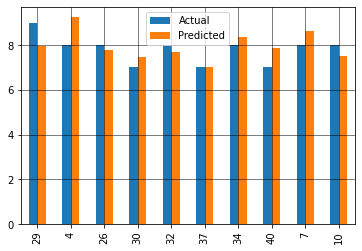

In [53]:
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black') 
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black') 
plt.show()

## 3.3.2. Задание*
### Задача:
#### Экспериментально получены N − значений величины Y при различных значениях величины X. Построить полиномы первой и второй степени, аппроксимирующие результаты эксперимента, с применением метода наименьших квадратов. Результаты выводятся в виде таблиц значений и графиков, полученных полиномов.

![wb4_ph1](photos/wb4_ph1.png)

### Решение / Ответ:
#### < Вариант 10 >

In [54]:
x = np.linspace(0.0, 1.0, 6)
y = np.array([6.0, 3.0, 2.0, 6.0, 2.0, 5.0])

def polinom_1(x, y):
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond = None)[0]
    print(m, c)
    
    plt.plot(x, y, 'D', markersize=5)
    plt.plot(x, m * x + c, '-', lw=2)
    plt.grid()
    plt.show()

def polinom_2(x, y):
    A = vstack((x**2, x, ones(len(x)))).T
    s = np.linalg.lstsq(A, y, rcond = None)[0]
    print(s)
    
    x_prec = linspace(min(x), max(x))
    
    plt.plot(x, y, 'D')
    plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', lw=2)
    plt.grid()
    plt.show()

-0.5714285714285755 4.2857142857142865


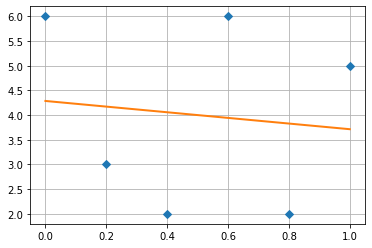

In [55]:
polinom_1(x, y)

[ 8.03571429 -8.60714286  5.35714286]


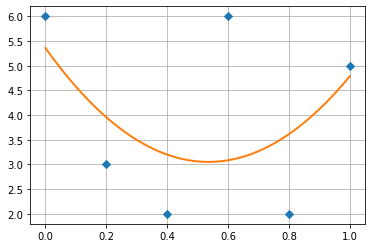

In [56]:
polinom_2(x, y)